# Greedy vs Epsilon-Greedy

Bandit algorithms seek to find ways to balance exploration vs. exploration of the available actions. A greedy action is one in which the action with the highest expected reward is chosen:
$$
\hat{a} = \underset{a}{\operatorname{argmax}} \mathbb{E}[R|a]\,,
$$
with ties between actions broken randomly. A bandit that always selects the greedy action is called the "Greedy Bandit" algorithm, and is implemented in this package in `bandit.GreedyBandit`.

Risk exists in being always greedy, because the bandit may have poor information about which action yields the highest expected reward which could yield in a sub-optimal selection. A basic was to mitigate this is to select an action purely at random some small fraction ($\epsilon$) of the time. That is, if the bandit takes $N$ steps in total, then we expect on average that $N\epsilon$ will result in completely random selections, while $N(1-\epsilon)$ will be greedy selection. This algorithm is called "Epsilon-Greedy" and is implimented here in `bandit.EpsGreedyBandit`.

## Bandit experiment

In this notebook we run an experiment where we take many greedy, epsilon-greedy, and purely random bandits and see how they perform. The environment that they sample rewards from is one with a small number of rewards (relative to the total number of steps taken) that yield Gaussian (normally) distributed rewards with unit variance and means distributed according to a unit Gaussian. In other words, the $i$-th bandit is distributed accoring to
$$
R_i \sim \mathcal{N}(\mu_i \sim \mathcal{N}(0, 1), 1)\,.
$$
Note that the means $\mu$ are drawn once at the start of the experiment and remain the same the whole time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bandit.bandit import (
    EpsGreedyBandit, 
    GreedyBandit, 
    RandomBandit,
)
from bandit.environment import Environment
from bandit.posse import Posse
from bandit.reward import GaussianReward
from bandit.figures import (
    plot_average_rewards,
    plot_reward_distributions,
)

In [3]:
# Basic set up
N_rewards = 10
N_bandits = 100  # number of each kind of bandit
N_steps = 1000

In [4]:
# Make the environment
rewards = [GaussianReward(mean = np.random.randn()) for _ in range(N_rewards)]
env = Environment(rewards)
best_choice = env.expected_rewards().argmax()

In [5]:
# Make the posses of bandits
rposse = Posse(env, RandomBandit, N_bandits)
gposse = Posse(env, GreedyBandit, N_bandits)
eposse = Posse(env, EpsGreedyBandit, N_bandits, eps=0.1)

In [6]:
# Take all steps
rposse.take_actions(N_steps)
gposse.take_actions(N_steps)
eposse.take_actions(N_steps)

Text(0, 0.5, 'Average Reward')

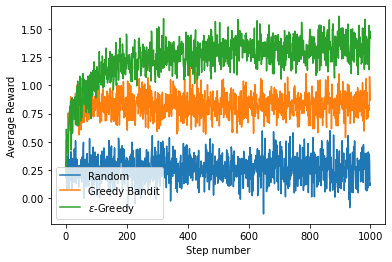

In [7]:
fig, ax = plt.subplots()
ax.plot(rposse.mean_reward(), label="Random")
ax.plot(gposse.mean_reward(), label="Greedy Bandit")
ax.plot(eposse.mean_reward(), label=r"$\epsilon$-Greedy")
ax.legend(loc="lower left")
ax.set_xlabel(r"Step number")
ax.set_ylabel("Average Reward")

In [8]:
rbest = rposse.mean_best_choice(best_choice)
gbest = gposse.mean_best_choice(best_choice)
ebest = eposse.mean_best_choice(best_choice)

Text(0, 0.5, 'Average fraction of optimal selection')

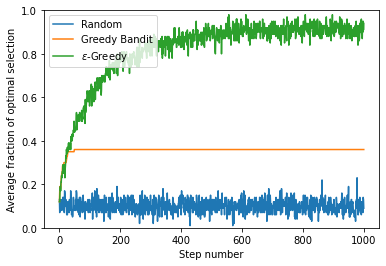

In [9]:
plt.plot(rbest, label="Random")
plt.plot(gbest, label="Greedy Bandit")
plt.plot(ebest, label=r"$\epsilon$-Greedy")
plt.ylim(0, 1)
ax = plt.gca()
ax.legend(loc="upper left")
ax.set_xlabel(r"Step number")
ax.set_ylabel("Average fraction of optimal selection")